# Model testing

In [1]:
import os
from pathlib import Path
import confinement_mode_classifier as cmc
import torchvision
import torch
from tqdm.notebook import tqdm
import torch.nn as nn

Seed set to 42


Device: cuda:0


In [3]:
path = Path(os.getcwd())
device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

batch_size = 32
shots = [16769, 18130, 18057]
shots_for_testing = shots

shot_df, test_df, _, _ = cmc.load_and_split_dataframes(path,shots, shots_for_testing, shots_for_validation = [])

test_dataloader = cmc.get_dloader(test_df, path=path, batch_size=batch_size, shuffle=False, balance_data=True)

In [4]:
pretrained_model = torchvision.models.resnet18(weights='IMAGENET1K_V1', )
# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = pretrained_model.fc.in_features
pretrained_model.fc = nn.Linear(num_ftrs, 3) #3 classes: L-mode, H-mode, ELM
pretrained_model = pretrained_model.to(device)

In [5]:
pretrained_model.load_state_dict(torch.load(f'{path}/runs/14-12-2023, 13-18-26 Compairing frozen and unfrozen models/model_fully_trained.pt'))

<All keys matched successfully>

In [6]:
pretrained_model.eval()
pretrained_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
num_of_subsequent_imgs = 3
for tick in range(num_of_subsequent_imgs):
    print(tick)

0
1
2


Processing batches:   0%|          | 0/197 [00:00<?, ?it/s]

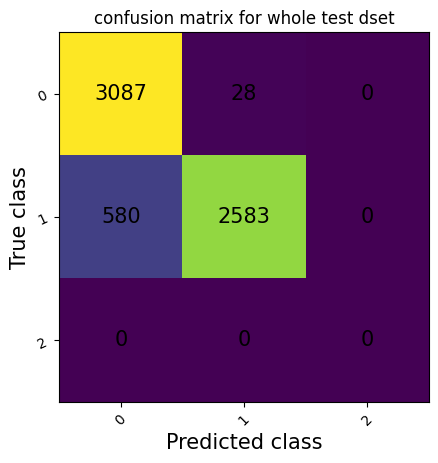

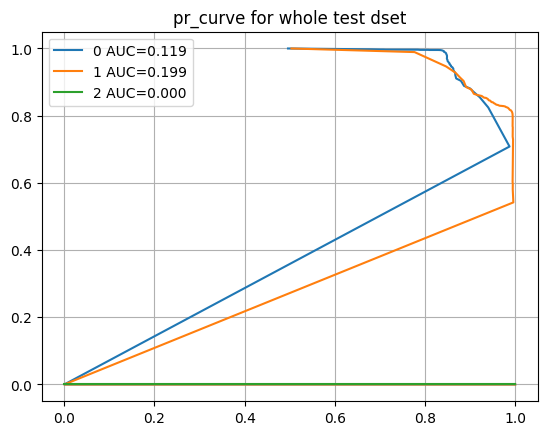

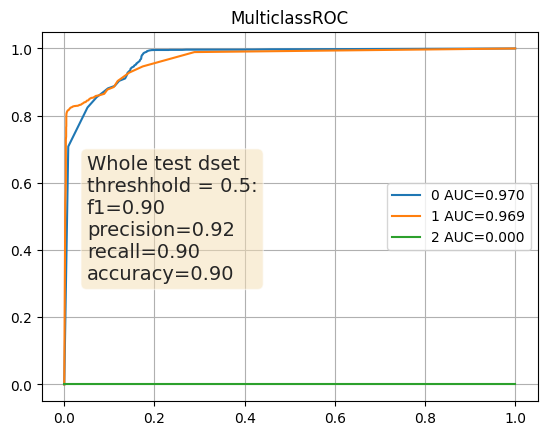

In [7]:
predictions_df, fig_confusion_matrix, f1, precision, recall, accuracy, pr_curve, roc_curve = cmc.test_model(path, pretrained_model, test_dataloader)

In [7]:
from importlib import reload
reload(cmc)

Seed set to 42


Device: cuda:0


<module 'confinement_mode_classifier' from '/compass/Shared/Users/bogdanov/vyzkumny_ukol/confinement_mode_classifier.py'>

  0%|          | 0/3 [00:00<?, ?it/s]

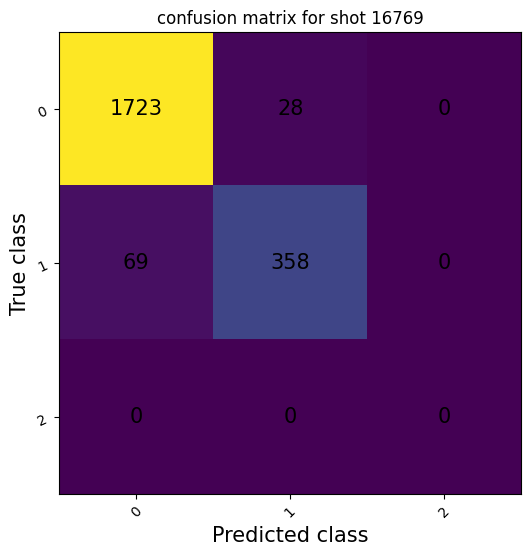

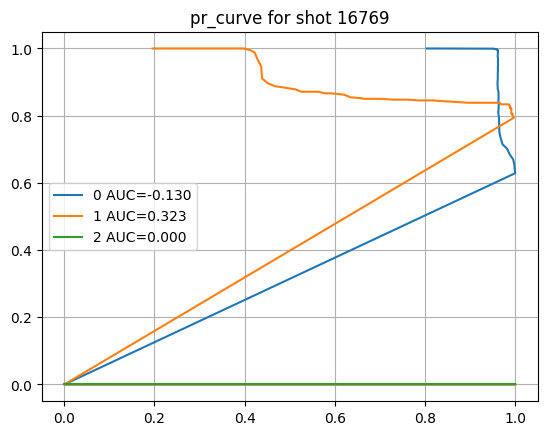

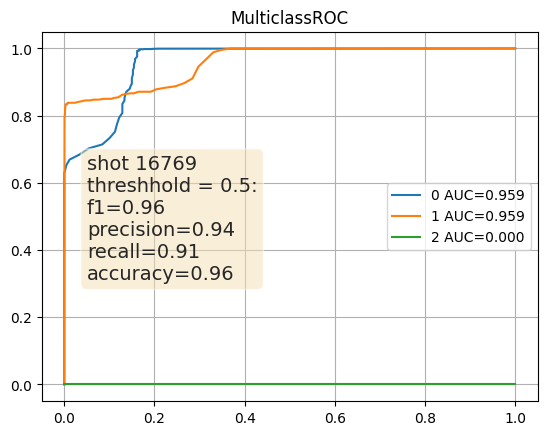

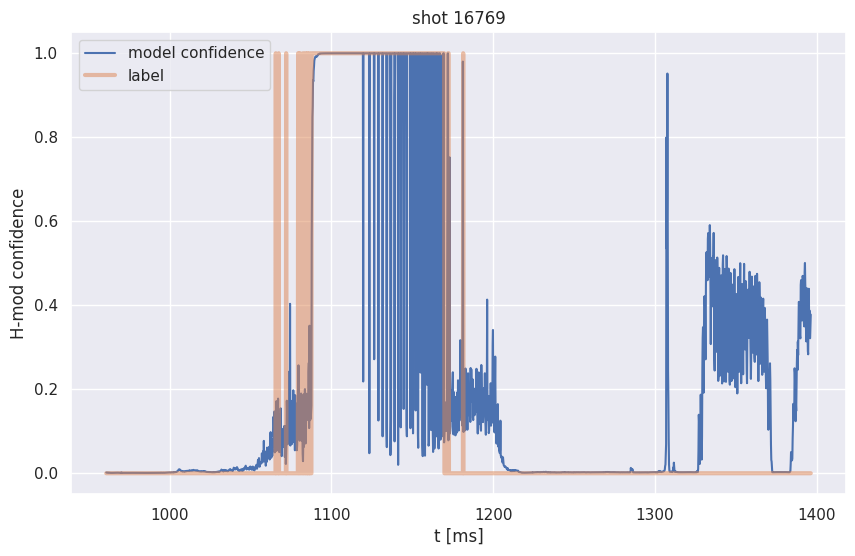

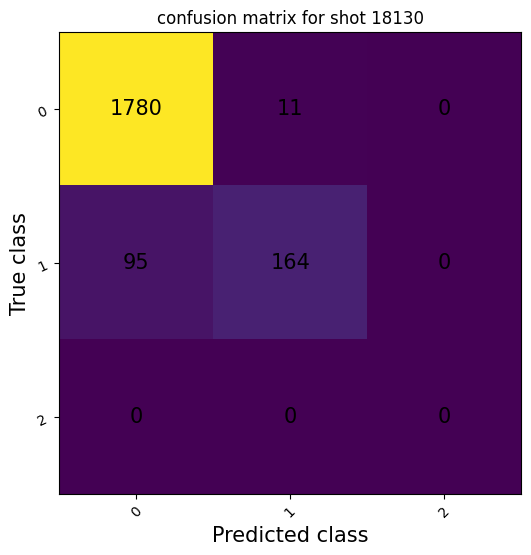

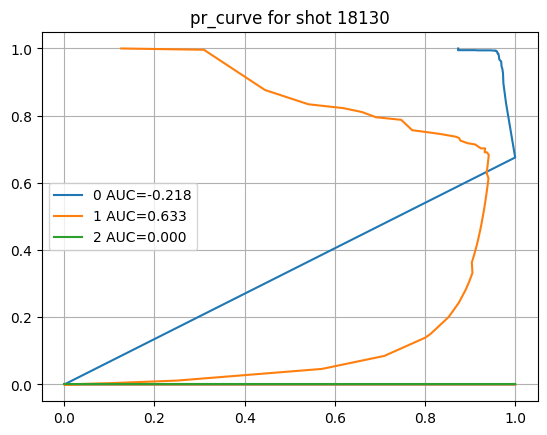

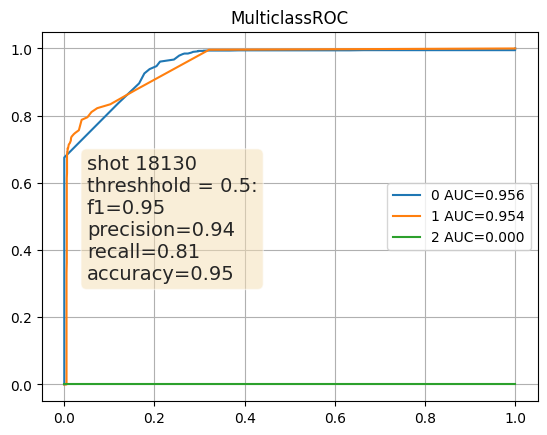

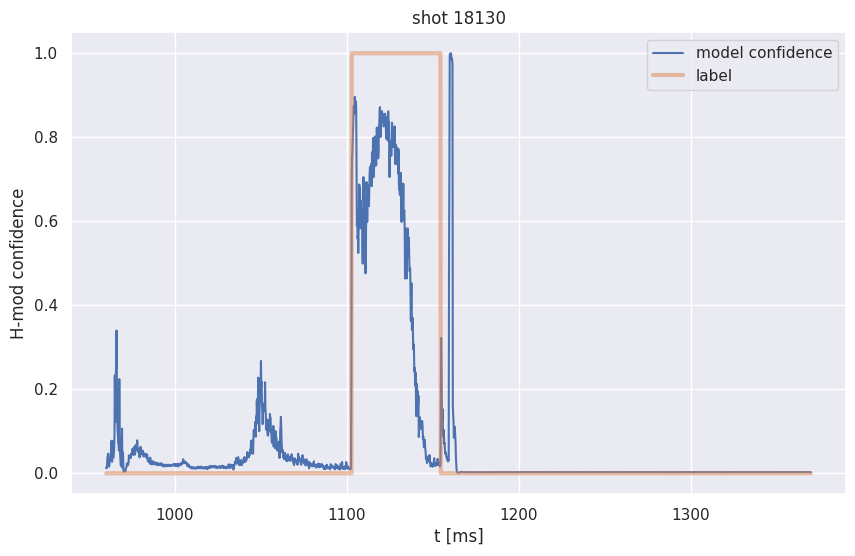

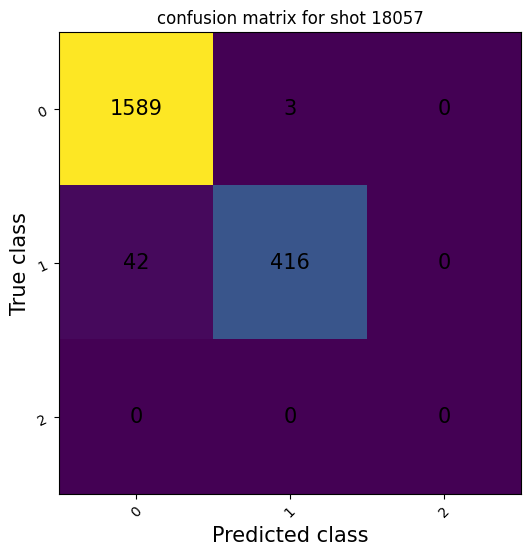

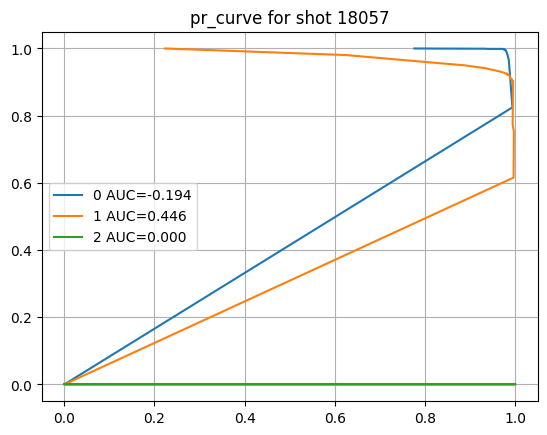

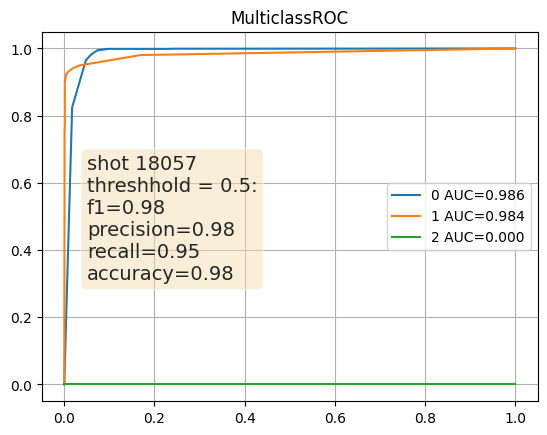

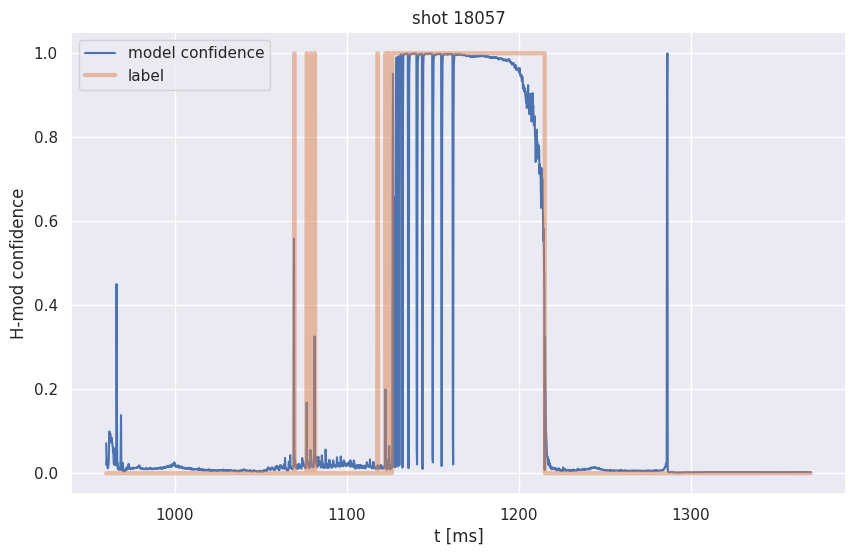

In [11]:
img_path = cmc.per_shot_test(path, shots=shots_for_testing, results_df=predictions_df)